In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('~/Downloads/Train.csv')
test = pd.read_csv('~/Downloads/Test.csv')

In [2]:
train.shape

(321437, 13)

In [3]:
# Lets combine the Dataset

combined = pd.concat([train, test], ignore_index = True)

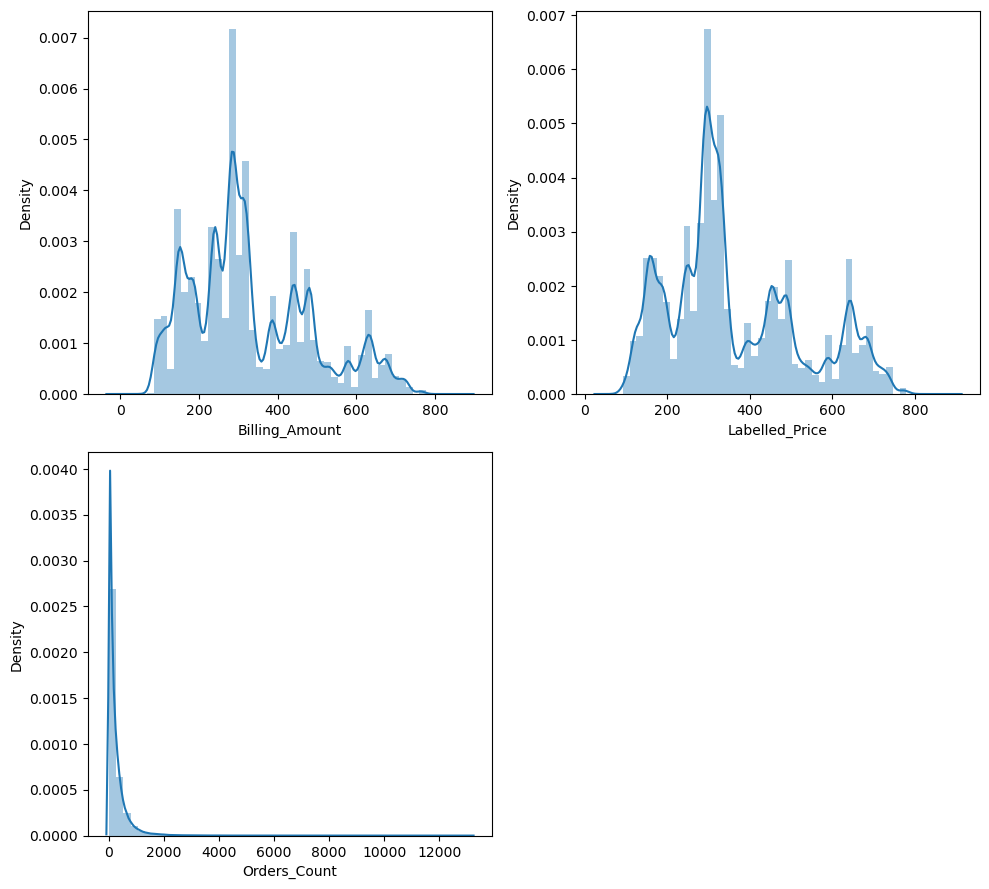

In [4]:
plt.figure(figsize = [10,9])
num_cols = ['Billing_Amount', 'Labelled_Price', 'Orders_Count']

nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
  plt.subplot(nrows, ncols, iterator)
  sns.distplot(combined.loc[:, i])
  iterator += 1

plt.tight_layout()
plt.show()

In [5]:
import scipy.stats as stats

In [20]:
combined.isnull().sum()

Period_No                                0
Facility_No                              0
Facility_Category                        0
City_Zip_Code                            0
Operational_Region_Coverage_Area         0
Billing_Amount                           0
Labelled_Price                           0
Custom_Promoted                          0
Promoted                                 0
Search_Promotions                        0
Orders_Count                        118070
Course                                   0
Flavour_Profile                          0
Quantity                                 0
dtype: int64

In [9]:
pvalues = []
for i in num_cols:
    teststats, pvalue = stats.ttest_ind(train.loc[:, i], train.Orders_Count)
    pvalues.append(pvalue)

In [11]:
pd.DataFrame(pvalues, index = num_cols, columns = ["Pvalue"])
# All features are Important                                                

,Pvalue
Billing_Amount,0.0
Labelled_Price,0.0
Orders_Count,1.0


In [12]:
cat_cols=['Period_No', 'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Facility_Category']

import statsmodels.formula.api as sfa

from statsmodels.stats.anova import anova_lm

model = sfa.ols("Orders_Count~Period_No+Custom_Promoted+Promoted+Search_Promotions+Facility_Category",
        data = combined).fit()

print(anova_lm(model))

                         df        sum_sq       mean_sq             F  \
Facility_Category       2.0  3.853415e+08  1.926708e+08   1521.332329   
Period_No               1.0  4.469243e+07  4.469243e+07    352.892363   
Custom_Promoted         1.0  4.108911e+09  4.108911e+09  32444.050565   
Promoted                1.0  1.903102e+09  1.903102e+09  15026.930995   
Search_Promotions       1.0  1.947709e+08  1.947709e+08   1537.915236   
Residual           321430.0  4.070785e+10  1.266461e+05           NaN   

                         PR(>F)  
Facility_Category  0.000000e+00  
Period_No          1.095383e-78  
Custom_Promoted    0.000000e+00  
Promoted           0.000000e+00  
Search_Promotions  0.000000e+00  
Residual                    NaN  


In [18]:
combined["Quantity"]= np.round(combined["Labelled_Price"]/combined["Billing_Amount"])  

In [21]:
# Period No has entries till 100 resonating wth Order Count
combined.groupby("Period_No")["Orders_Count"].describe()[:100]

,count,mean,std,min,25%,50%,75%,max
Period_No,,,,,,,,
1,3250.0,205.896000,253.210473,13.0,53.0,122.0,269.0,2822.0
2,3290.0,242.832219,289.594577,13.0,55.0,148.0,312.0,2715.0
3,3286.0,229.356665,277.997060,13.0,54.0,135.0,296.0,3172.0
4,3212.0,228.412827,277.741486,13.0,53.0,134.0,310.0,2848.0
5,3240.0,237.643210,294.750044,13.0,53.0,123.0,323.0,3012.0
...,...,...,...,...,...,...,...,...
96,3097.0,286.625767,372.542244,13.0,55.0,162.0,378.0,5576.0
97,3109.0,299.257639,377.704739,13.0,55.0,163.0,393.0,6576.0
98,3107.0,416.708722,768.388798,13.0,67.0,161.0,405.0,9532.0


In [22]:
#@combined.groupby("Facility_No")["Orders_Count"].describe()

# Order Count Facility Wise

combined["OC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('count')
combined["AOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('mean')
combined["MOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('median')
combined["MinOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('min')
combined["MaxAOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('max')
combined["SDAOC_FW"] = combined.groupby("Facility_No")["Orders_Count"].transform('std')

In [23]:
combined["Magic1"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('count')
combined["Magic2"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('mean')
combined["Magic3"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('median')
combined["Magic4"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('min')
combined["Magic5"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('max')
combined["Magic6"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform('std')

In [26]:
combined.drop(["Facility_No", "City_Zip_Code"], axis = 1, inplace = True)

In [24]:
#combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].describe()

combined["Magic7"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('count')
combined["Magic8"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('mean')
combined["Magic9"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('median')
combined["Magic10"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('min')
combined["Magic11"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('max')
combined["Magic12"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform('std')

In [34]:
pd.set_option("display.max_columns", 100)
combined.head()

,Period_No,Facility_Category,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile,Quantity,OC_FW,AOC_FW,MOC_FW,MinOC_FW,MaxAOC_FW,SDAOC_FW,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12
0,1,c1,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion,1.0,4118,207.096163,134.0,13.0,3374.0,258.871277,66360,215.997107,134.0,13.0,9532.0,289.687066,18103,313.646523,148.0,13.0,10544.0,473.337118
1,1,c3,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion,1.0,4298,257.586087,109.0,13.0,7088.0,430.839680,134451,318.114131,161.0,13.0,13150.0,464.342597,36987,222.396247,122.0,13.0,9532.0,329.431315
2,1,c3,167,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western,1.0,3635,160.554058,95.0,13.0,2930.0,216.484447,134451,318.114131,161.0,13.0,13150.0,464.342597,6653,160.297760,94.0,13.0,4009.0,224.186851
3,1,c3,2,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian,1.0,3261,200.477461,108.0,13.0,4726.0,316.956115,81986,203.351487,122.0,13.0,6426.0,263.878412,7575,244.712739,149.0,13.0,4726.0,298.571900
4,1,c3,18,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion,1.0,3240,168.157716,95.0,13.0,2741.0,233.959012,81986,203.351487,122.0,13.0,6426.0,263.878412,17767,184.067372,107.0,13.0,5334.0,252.308016


In [35]:
combined.Operational_Region_Coverage_Area.value_counts()[:5].index

Index([62, 41, 574, 12, 1], dtype='int64', name='Operational_Region_Coverage_Area')

In [36]:
top5 = [62, 41, 574, 12, 1]

def convert(x):
    if x in top5:
        return("top5")
    else:
        return("Others")

In [37]:
combined["area"] = combined.Operational_Region_Coverage_Area.apply(convert)

In [38]:
combined.drop('Operational_Region_Coverage_Area', axis = 1, inplace = True)

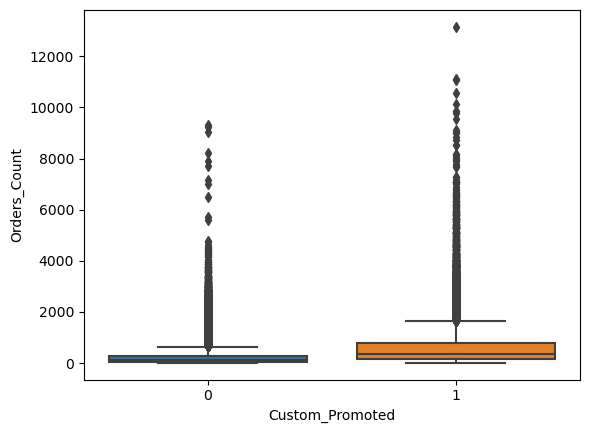

In [39]:
sns.boxplot(x="Custom_Promoted", y = "Orders_Count", data=combined)
plt.show()

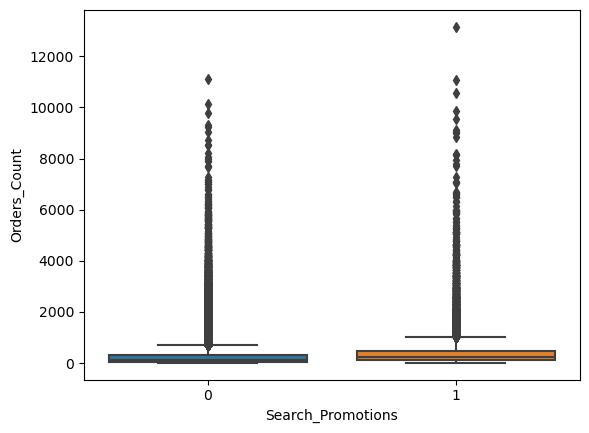

In [40]:
sns.boxplot(x="Search_Promotions", y = "Orders_Count", data=combined)
plt.show()

In [41]:
combined["Promotions"] = combined.Custom_Promoted+combined.Promoted+combined.Search_Promotions

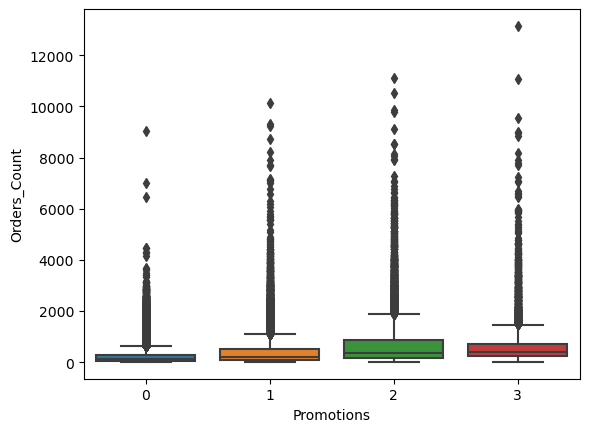

In [42]:
sns.boxplot(x="Promotions", y = "Orders_Count", data=combined)
plt.show()

In [43]:
combined.groupby("Promotions")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Promotions,,,,,,,,
0,267296.0,211.184245,258.580947,13.0,42.0,121.0,283.0,9045.0
1,32589.0,406.138360,540.504742,13.0,94.0,216.0,501.0,10140.0
2,14243.0,686.356315,865.584090,13.0,175.0,377.0,863.0,11110.0
3,7309.0,630.252702,772.219294,13.0,230.0,405.0,728.0,13150.0


In [44]:
combined.drop(['Custom_Promoted', 'Promoted', 'Search_Promotions'], 
              axis =1, inplace = True)

In [45]:
combined.head()

,Period_No,Facility_Category,Billing_Amount,Labelled_Price,Orders_Count,Course,Flavour_Profile,Quantity,OC_FW,AOC_FW,MOC_FW,MinOC_FW,MaxAOC_FW,SDAOC_FW,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,area,Promotions
0,1,c1,192.955562,267.971749,123.0,Finger Foods,Asian Fusion,1.0,4118,207.096163,134.0,13.0,3374.0,258.871277,66360,215.997107,134.0,13.0,9532.0,289.687066,18103,313.646523,148.0,13.0,10544.0,473.337118,Others,0
1,1,c3,193.384864,203.836706,55.0,Broths & Stews,Asian Fusion,1.0,4298,257.586087,109.0,13.0,7088.0,430.839680,134451,318.114131,161.0,13.0,13150.0,464.342597,36987,222.396247,122.0,13.0,9532.0,329.431315,top5,0
2,1,c3,384.988183,388.957411,204.0,Smoothies & Juices,Western,1.0,3635,160.554058,95.0,13.0,2930.0,216.484447,134451,318.114131,161.0,13.0,13150.0,464.342597,6653,160.297760,94.0,13.0,4009.0,224.186851,Others,0
3,1,c3,255.251864,263.923874,257.0,Grain Bowls,South Asian,1.0,3261,200.477461,108.0,13.0,4726.0,316.956115,81986,203.351487,122.0,13.0,6426.0,263.878412,7575,244.712739,149.0,13.0,4726.0,298.571900,Others,0
4,1,c3,319.949514,326.128813,14.0,Appetizers,Asian Fusion,1.0,3240,168.157716,95.0,13.0,2741.0,233.959012,81986,203.351487,122.0,13.0,6426.0,263.878412,17767,184.067372,107.0,13.0,5334.0,252.308016,Others,0


In [46]:
combined.Course.unique()

array(['Finger Foods', 'Broths & Stews', 'Smoothies & Juices',
       'Grain Bowls', 'Appetizers', 'Grilled Vegetables',
       'Sweets & Treats', 'Wraps & Rolls', 'Noodles & Veggies',
       'Fresh Greens', 'Condiments & Dips', 'Plant-Based Proteins',
       'Stir-Fried Rice', 'Flatbreads'], dtype=object)

In [47]:
combined.Flavour_Profile.unique()

array(['Asian Fusion', 'Western', 'South Asian', 'Mediterranean'],
      dtype=object)

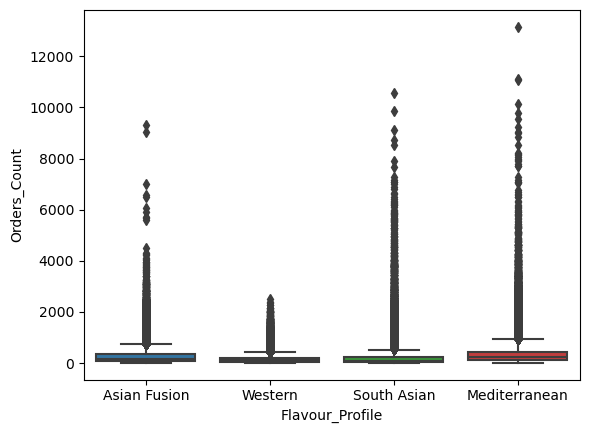

In [48]:
sns.boxplot(x="Flavour_Profile", y = "Orders_Count", data=combined)
plt.show()

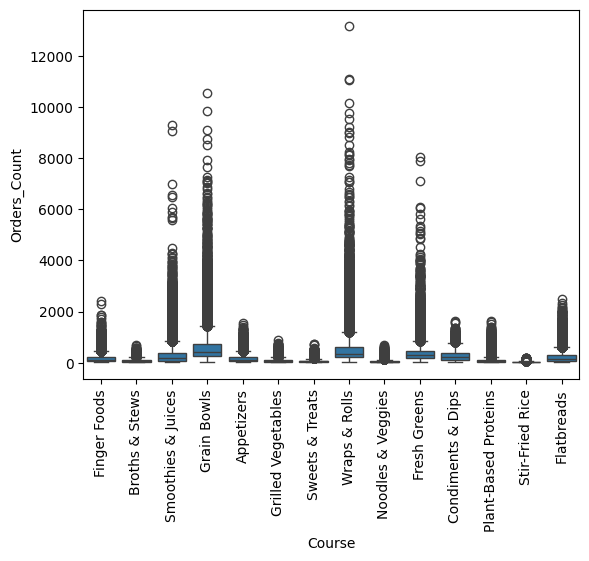

In [76]:
sns.boxplot(x="Course", y = "Orders_Count", data=combined)
plt.xticks(rotation = 90)
plt.show()

In [49]:
combined.groupby("Course")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Course,,,,,,,,
Appetizers,20382.0,155.968992,143.935574,13.0,54.0,109.0,215.0,1554.0
Broths & Stews,8889.0,88.900551,72.350096,13.0,40.0,68.0,121.0,689.0
Condiments & Dips,9350.0,281.830909,222.736124,13.0,122.0,216.0,391.0,1620.0
Finger Foods,20895.0,164.194783,164.063729,13.0,54.0,121.0,216.0,2404.0
Flatbreads,22779.0,233.691382,235.383834,13.0,82.0,161.0,296.0,2499.0
Fresh Greens,22850.0,389.665996,372.423667,13.0,190.0,298.0,459.0,8059.0
Grain Bowls,22937.0,600.332825,614.775419,13.0,257.0,433.0,729.0,10544.0
Grilled Vegetables,10121.0,85.583638,80.312274,13.0,28.0,67.0,109.0,879.0
Noodles & Veggies,18601.0,58.128111,53.681616,13.0,26.0,41.0,69.0,690.0


In [54]:
#combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].describe()

combined["Magic13"] = combined.groupby("Course")["Orders_Count"].transform('count')
combined["Magic14"] = combined.groupby("Course")["Orders_Count"].transform('mean')
combined["Magic15"] = combined.groupby("Course")["Orders_Count"].transform('median')
combined["Magic16"] = combined.groupby("Course")["Orders_Count"].transform('min')
combined["Magic17"] = combined.groupby("Course")["Orders_Count"].transform('max')
combined["Magic18"] = combined.groupby("Course")["Orders_Count"].transform('std')

Index(['Smoothies & Juices', 'Grain Bowls', 'Wraps & Rolls', 'Flatbreads',
       'Appetizers'],
      dtype='object', name='Course')


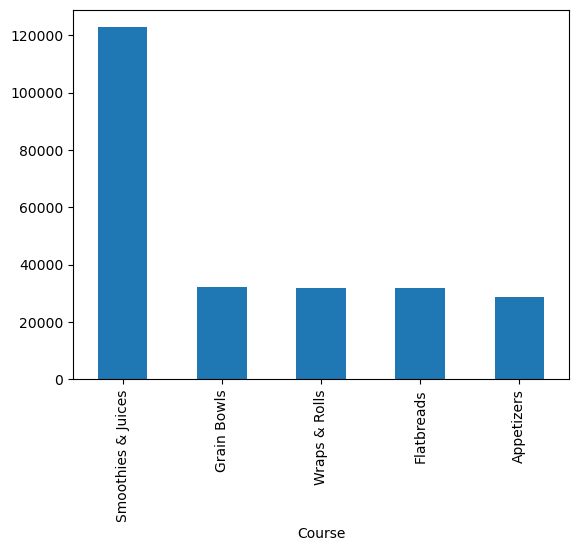

In [50]:
print(combined.Course.value_counts()[:5].index)
combined.Course.value_counts()[:5].plot(kind = "bar")
plt.show()

In [51]:
foods = ['Smoothies & Juices', 'Grain Bowls', 'Wraps & Rolls', 'Flatbreads',
       'Fresh Greens']

def khana_khazana(x):
    if x in foods:
        return("Top5_Foods")
    else:
        return("Other_Foods")

combined["Course_Cat"]= combined.Course.apply(khana_khazana)

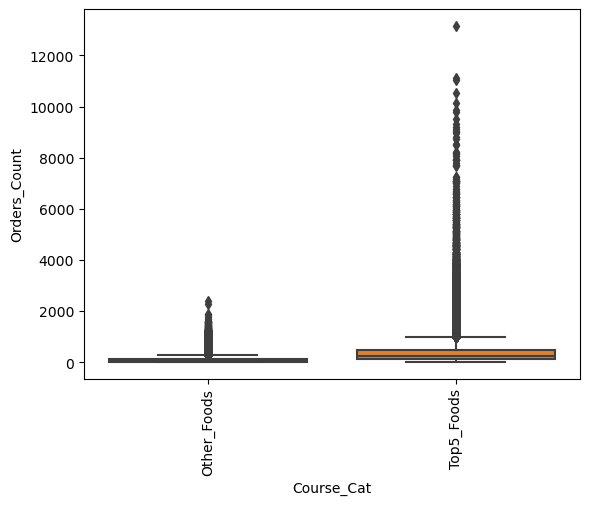

In [52]:
sns.boxplot(x="Course_Cat", y = "Orders_Count", data=combined)
plt.xticks(rotation = 90)
plt.show()

In [55]:
combined.head()

,Period_No,Facility_Category,Billing_Amount,Labelled_Price,Orders_Count,Course,Flavour_Profile,Quantity,OC_FW,AOC_FW,MOC_FW,MinOC_FW,MaxAOC_FW,SDAOC_FW,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,area,Promotions,Course_Cat,Magic13,Magic14,Magic15,Magic16,Magic17,Magic18
0,1,c1,192.955562,267.971749,123.0,Finger Foods,Asian Fusion,1.0,4118,207.096163,134.0,13.0,3374.0,258.871277,66360,215.997107,134.0,13.0,9532.0,289.687066,18103,313.646523,148.0,13.0,10544.0,473.337118,Others,0,Other_Foods,20895,164.194783,121.0,13.0,2404.0,164.063729
1,1,c3,193.384864,203.836706,55.0,Broths & Stews,Asian Fusion,1.0,4298,257.586087,109.0,13.0,7088.0,430.839680,134451,318.114131,161.0,13.0,13150.0,464.342597,36987,222.396247,122.0,13.0,9532.0,329.431315,top5,0,Other_Foods,8889,88.900551,68.0,13.0,689.0,72.350096
2,1,c3,384.988183,388.957411,204.0,Smoothies & Juices,Western,1.0,3635,160.554058,95.0,13.0,2930.0,216.484447,134451,318.114131,161.0,13.0,13150.0,464.342597,6653,160.297760,94.0,13.0,4009.0,224.186851,Others,0,Top5_Foods,88363,314.610233,188.0,13.0,9303.0,381.076319
3,1,c3,255.251864,263.923874,257.0,Grain Bowls,South Asian,1.0,3261,200.477461,108.0,13.0,4726.0,316.956115,81986,203.351487,122.0,13.0,6426.0,263.878412,7575,244.712739,149.0,13.0,4726.0,298.571900,Others,0,Top5_Foods,22937,600.332825,433.0,13.0,10544.0,614.775419
4,1,c3,319.949514,326.128813,14.0,Appetizers,Asian Fusion,1.0,3240,168.157716,95.0,13.0,2741.0,233.959012,81986,203.351487,122.0,13.0,6426.0,263.878412,17767,184.067372,107.0,13.0,5334.0,252.308016,Others,0,Other_Foods,20382,155.968992,109.0,13.0,1554.0,143.935574


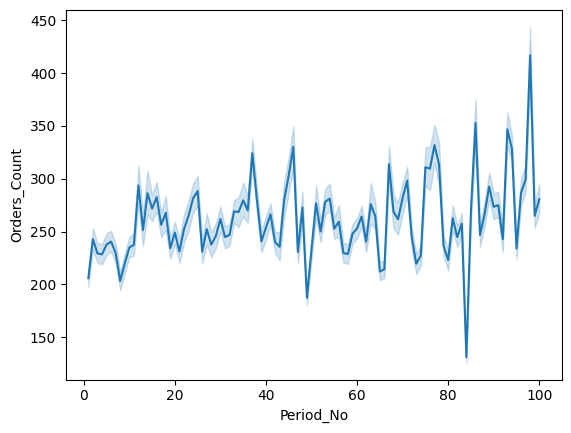

In [90]:
sns.lineplot(x = 'Period_No', y = 'Orders_Count', data = combined)
plt.show()

In [94]:
train.groupby("Period_No")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Period_No,,,,,,,,
1,3250.0,205.896000,253.210473,13.0,53.0,122.0,269.0,2822.0
2,3290.0,242.832219,289.594577,13.0,55.0,148.0,312.0,2715.0
3,3286.0,229.356665,277.997060,13.0,54.0,135.0,296.0,3172.0
4,3212.0,228.412827,277.741486,13.0,53.0,134.0,310.0,2848.0
5,3240.0,237.643210,294.750044,13.0,53.0,123.0,323.0,3012.0
...,...,...,...,...,...,...,...,...
96,3097.0,286.625767,372.542244,13.0,55.0,162.0,378.0,5576.0
97,3109.0,299.257639,377.704739,13.0,55.0,163.0,393.0,6576.0
98,3107.0,416.708722,768.388798,13.0,67.0,161.0,405.0,9532.0


In [57]:
# Assuming the periods repeat every 12 months (as an example)

# Identifying Cyclical Pattern
max_period = 12

combined['sin_period'] = np.sin(2 * np.pi * combined['Period_No'] / max_period)
combined['cos_period'] = np.cos(2 * np.pi * combined['Period_No'] / max_period)

In [64]:
combined.drop(["Period_No", "Course"], axis = 1, inplace = True)

In [62]:
#cat_cols=['Facility_Category', "Flavour_Profile", "area", "Course_Cat", "Promotions"]

import statsmodels.formula.api as sfa

from statsmodels.stats.anova import anova_lm

model = sfa.ols("Orders_Count~Facility_Category+Flavour_Profile+area+Course_Cat+Promotions",
        data = combined).fit()

print(anova_lm(model))

                         df        sum_sq       mean_sq             F  \
Facility_Category       2.0  3.853415e+08  1.926708e+08   1845.979470   
Flavour_Profile         3.0  1.870291e+09  6.234304e+08   5973.090193   
area                    1.0  4.734250e+07  4.734250e+07    453.588769   
Course_Cat              1.0  6.080935e+09  6.080935e+09  58261.464850   
Promotions              1.0  5.412289e+09  5.412289e+09  51855.170561   
Residual           321428.0  3.354846e+10  1.043732e+05           NaN   

                          PR(>F)  
Facility_Category   0.000000e+00  
Flavour_Profile     0.000000e+00  
area               1.402311e-100  
Course_Cat          0.000000e+00  
Promotions          0.000000e+00  
Residual                     NaN  


In [66]:
# Split the Data into train and test

newtrain = combined.loc[0:train.shape[0]-1, :]
newtest= combined.loc[train.shape[0]:, :]

train.shape, test.shape, newtrain.shape, newtest.shape

((321437, 13), (118070, 12), (321437, 35), (118070, 35))

In [67]:
newtrain.select_dtypes(include = np.number).columns

Index(['Billing_Amount', 'Labelled_Price', 'Orders_Count', 'Quantity', 'OC_FW',
       'AOC_FW', 'MOC_FW', 'MinOC_FW', 'MaxAOC_FW', 'SDAOC_FW', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8',
       'Magic9', 'Magic10', 'Magic11', 'Magic12', 'Promotions', 'Magic13',
       'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18', 'sin_period',
       'cos_period'],
      dtype='object')

In [129]:
nums = ['Billing_Amount', 'Labelled_Price', 'Quantity', 'OC_FW',
       'AOC_FW', 'MOC_FW', 'MinOC_FW', 'MaxAOC_FW', 'SDAOC_FW', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8',
       'Magic9', 'Magic10', 'Magic11', 'Magic12', 'Promotions', 'Magic13',
       'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18', 'sin_period',
       'cos_period']

pvalue = []

for i in nums:
    test, pvals = stats.ttest_ind(newtrain.loc[:, i], newtrain.Orders_Count)
    pvalue.append(pvals)

In [130]:
pd.DataFrame(pvals, columns = ["PValue"], 
             index = nums).sort_values(by="PValue", ascending = False)

,PValue
Billing_Amount,0.0
Labelled_Price,0.0
sin_period,0.0
Magic18,0.0
Magic17,0.0
Magic16,0.0
Magic15,0.0
Magic14,0.0
Magic13,0.0
Promotions,0.0


## Machine Learning

In [72]:
newtest.drop("Orders_Count", axis = 1, inplace = True)

In [73]:
from sklearn.ensemble import RandomForestRegressor

X = newtrain.drop('Orders_Count', axis =1)
y = newtrain.Orders_Count

In [74]:
rf = RandomForestRegressor()

dummytrain = pd.get_dummies(X,drop_first = True)
dummytest = pd.get_dummies(newtest,drop_first = True)

pred_rf = rf.fit(dummytrain, y).predict(dummytest)

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

pred_gbm = gbm.fit(dummytrain, y).predict(dummytest)

In [108]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

pred_xgb = xgb.fit(dummytrain, y).predict(dummytest)
submission3 = pd.DataFrame({"Orders_Count":pred_xgb})
submission3.to_csv("XGBModel.csv", index = False) # 218

In [78]:
submission = pd.DataFrame({"Orders_Count":pred_rf})
submission.to_csv("RFModel.csv", index = False)

submission2 = pd.DataFrame({"Orders_Count":pred_gbm})
submission2.to_csv("GBMModel.csv", index = False)

### Neural Net Model

In [83]:
# Scale features using StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_dim=dummytrain.shape[1]),  # Input Layer
    Dropout(0.2),                                              # Dropout for regularization
    Dense(64, activation='relu'),                              # Hidden Layer 1
    Dropout(0.2),
    Dense(32, activation='relu'),                              # Hidden Layer 2
    Dense(1, activation='linear')                              # Output Layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(dummytrain, y,epochs=50,batch_size=32,verbose=1)

# Predict on test data
test_predictions = model.predict(dummytest)

submission_nn = pd.DataFrame({"Orders_Count":test_predictions})
submission_nn.to_csv("NNModel.csv", index = False)

Epoch 1/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 824270.5625 - mae: 364.2554
Epoch 2/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 109670.1875 - mae: 175.8866
Epoch 3/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 98219.2891 - mae: 163.1335
Epoch 4/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 96486.0234 - mae: 162.1399
Epoch 5/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 91237.6953 - mae: 157.5733
Epoch 6/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 86223.5703 - mae: 154.8953
Epoch 7/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 88142.5547 - mae: 156.7052
Epoch 8/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 85716.1953 - mae: 155.6472
Epoch 9/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 100581.1094 - mae: 166.8320
Epoch 10/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 91799.0547 - mae: 161.4151
Epoch 11/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 117338.039

KeyboardInterrupt: 

In [84]:
# Build the Neural Network - Batch Normalization & Early Stopping
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_dim=dummytrain.shape[1]),  # Input Layer
    BatchNormalization(),
    Dropout(0.3),                                              # Dropout for regularization
    Dense(64, activation='relu'),                              # Hidden Layer 1
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),                              # Hidden Layer 2
    Dense(1, activation='linear')                              # Output Layer for regression
])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(dummytrain, y,epochs=50,batch_size=32,verbose=1, callbacks=[early_stopping])

Epoch 1/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 163539.9062 - mae: 217.2480
Epoch 2/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 105468.5859 - mae: 171.5666
Epoch 3/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 100916.3125 - mae: 165.2035
Epoch 4/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 98905.0547 - mae: 163.1043
Epoch 5/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 93150.6719 - mae: 160.4221
Epoch 6/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 93582.9375 - mae: 160.0988
Epoch 7/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 90542.2109 - mae: 157.0329
Epoch 8/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 87026.1094 - mae: 155.6752
Epoch 9/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 87634.2031 - mae: 155.4136
Epoch 10/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 87398.5234 - mae: 153.8253
Epoch 11/50
10045/10045 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 84246.7656

ValueError: Per-column arrays must each be 1-dimensional

In [101]:
# Predict on test data
test_predictions = model.predict(dummytest)

3690/3690 ━━━━━━━━━━━━━━━━━━━━ 3s 887us/step


In [106]:
submission_nn = pd.DataFrame(test_predictions, columns = ["Orders_Count"]) # RMSE: 1915
submission_nn.to_csv("NNModelNew.csv", index = False)

### Tune Random Forest Model

In [113]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50, 100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20, 30, 40],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required in a leaf
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider
    'bootstrap': [True, False]                     # Bootstrap sampling
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of configurations to try
    scoring='neg_mean_squared_error',  # Evaluation metric
    cv=3,  # Cross-validation splits
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

random_search.fit(dummytrain, y)

# Best parameters from Randomized Search
print("Best Parameters from Randomized Search:")
print(random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters from Randomized Search:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],                   # Refine based on Randomized Search
    'max_depth': [10, 20],                        # Refine based on Randomized Search
    'min_samples_split': [5, 10],                 # Refine based on Randomized Search
    'min_samples_leaf': [1, 2],                   # Refine based on Randomized Search
    'max_features': ['auto', 'sqrt'],             # Refine based on Randomized Search
    'bootstrap': [True]                           # Fix based on Randomized Search
}

# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(dummytrain, y)

# Best parameters from Grid Search
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters from Grid Search:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [115]:
# Using Randomized Search CV Results to build Tuned Random Forest Model
rf = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=1,
                          max_features="sqrt", max_depth=30, bootstrap=True)

pred_rf = rf.fit(dummytrain, y).predict(dummytest)

In [116]:
submission2 = pd.DataFrame({"Orders_Count":pred_rf})
submission2.to_csv("RFTUNEDModel.csv", index = False) #212